In [492]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Datenimport
Quelle der Daten: https://data.milwaukee.gov/dataset/property-sales-data

In [493]:
FILEPATH_2020 = os.path.join("..", "input", "armslengthsales_2020_valid.csv")
FILEPATH_2021 = os.path.join("..", "input", "armslengthsales_2021_valid.csv")
FILEPATH_2022 = os.path.join("..", "input", "armslengthsales_2022_valid.csv")

In [494]:
df_2020 = pd.read_csv(FILEPATH_2020)
df_2021 = pd.read_csv(FILEPATH_2021)
df_2022 = pd.read_csv(FILEPATH_2022)

In [495]:
#df = pd.concat([df_2020, df_2021, df_2022])
df = df_2022

## EDA

### Beschreibung und Analyse des Datensatzes
Der Datensatz beinhaltet Verkaufsdaten über Wohnhäuser, Eigentumswohnungen, Gewerbeimmobilien, Apartments und unbebaute Grundstücke. <br>
<br>
7146 Zeilen<br>
8168 fehlende Werte<br>
20 Variablen

```PropertyID``` - Enthält die eindeutige ID der Immobilie  
```PropType``` - Enthält den Typ der Immobilie - 6 verschiedene mit Anteil in %: 81,4% Residential (Wohnimmobilien), 13% Condominium (Eigentumswohnungen), 3% Large Apartment (Große Wohnungen), 2,6% Commercial (Gewerbeimmobilien), <0,1% Manufacturing (Produktionsstätten), <0,1% Exempt (Andere)  
```taxkey``` - Enthält die eindeutige Steuerliche Kennung der Immobilie  
```Address``` - Enthält die Adresse der Immobilie  
```CondoProject``` - Nur für Condominium (Eigentumswohnungen) relevant - enthält einen Projektnamen  
```District``` - Nummer des Districts (Stadtteil) von Milwaukee  
```nbhd``` - Nummer der "Nachbarschaft" - vermutlich eine detaillierte Einteilung der Districts  
```Style``` - Enthält die "Art" der Immobilie wie Ranch, Townhouse und Medical Clinic  
```Extwall``` - Beschreibt die Außenverkleidung der Immobilie wie Aluminium/Vinyl, Wood (Holz) oder Bricks (Ziegel)  
```Stories```- Enthält die Anzahl der Stockwerke der Immobilie  
```Year_Built``` - Enthält das Baujahr der Immobilie  
```Rooms``` - Enthält die Anzahl der Räume der Immobilie  
```FinishedSqft``` - Beschreibt die Gesamtfläche in Quadrratfuß der Immobilie an 1 Quardratfuß = 0,092903 Quadratmeter  
```Units``` - Enthält die Anzahl an Wohneineinheiten der Immobilie  
```Bdrms``` - Enthält die Anzahl an Schlafzimmern der Immobilie  
```Fbath``` - Enthält die Anzahl an "Vollbädern" (Badezimmer mit Badewanne/Dusche) der Immobilie  
```Hbath``` - Enthält die Anzahl an "Halbbädern" (Badezimmer ohne Badewanne/Dusche) der Immobilie  
```Lotsize``` - Enthält die Größe des Grundstücks, auf dem die Immobilie steht
```Sale_date``` - Enthält das Datum, an dem die Immobilie verkauft wurde
```Sale_prize```

### Fehlende Werte prüfen und entfernen

In [496]:
# Entfernen der irrelevanten Spalten
df = df.drop('PropertyID', axis=1)
df = df.drop('taxkey', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('CondoProject', axis=1)

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropType      7146 non-null   object 
 1   District      7146 non-null   int64  
 2   nbhd          7146 non-null   int64  
 3   Style         7125 non-null   object 
 4   Extwall       6220 non-null   object 
 5   Stories       7107 non-null   float64
 6   Year_Built    7135 non-null   float64
 7   Rooms         6703 non-null   float64
 8   FinishedSqft  7122 non-null   float64
 9   Units         7146 non-null   int64  
 10  Bdrms         6703 non-null   float64
 11  Fbath         7146 non-null   int64  
 12  Hbath         7146 non-null   int64  
 13  Lotsize       7146 non-null   int64  
 14  Sale_date     7146 non-null   object 
 15  Sale_price    7146 non-null   float64
dtypes: float64(6), int64(6), object(4)
memory usage: 893.4+ KB


In [498]:
num_features = ["Stories", "Year_Built", "Rooms", "FinishedSqft", "Units", "Bdrms", "Fbath", "Hbath", "Lotsize"]
cat_features = ["PropType", "District", "nbhd", "Style", "Extwall"]

In [499]:
df.nunique()

PropType           6
District          15
nbhd             459
Style             81
Extwall           18
Stories           13
Year_Built       155
Rooms             40
FinishedSqft    2386
Units             49
Bdrms             24
Fbath              8
Hbath              4
Lotsize         1670
Sale_date        313
Sale_price      1284
dtype: int64

In [500]:
df.isna().sum()

PropType          0
District          0
nbhd              0
Style            21
Extwall         926
Stories          39
Year_Built       11
Rooms           443
FinishedSqft     24
Units             0
Bdrms           443
Fbath             0
Hbath             0
Lotsize           0
Sale_date         0
Sale_price        0
dtype: int64

In [501]:
df.isna().sum() / df.isna().count()

PropType        0.000000
District        0.000000
nbhd            0.000000
Style           0.002939
Extwall         0.129583
Stories         0.005458
Year_Built      0.001539
Rooms           0.061993
FinishedSqft    0.003359
Units           0.000000
Bdrms           0.061993
Fbath           0.000000
Hbath           0.000000
Lotsize         0.000000
Sale_date       0.000000
Sale_price      0.000000
dtype: float64

### Verteilung von y (sale_price)

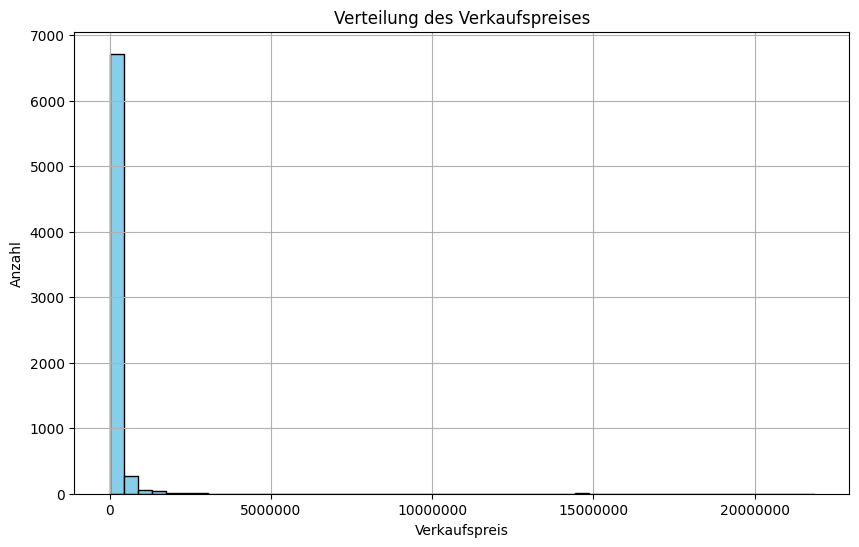

In [502]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sale_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Verteilung des Verkaufspreises')
plt.xlabel('Verkaufspreis')
plt.ylabel('Anzahl')
plt.ticklabel_format(style='plain', axis='x') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.grid(True)
plt.show()

### Feature - PropType

In [503]:
df['PropType'].value_counts()

PropType
Residential      5774
Condominium       887
Commercial        240
Lg Apartment      238
Manufacturing       6
Exempt              1
Name: count, dtype: int64

In [504]:
df[df['PropType'].isin(['Exempt', 'Manufacturing'])]

,PropType,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Manufacturing,9,6300,Service Building,Concrete Block,1.0,1978.0,NaN,20600.0,6,NaN,0,0,0,2022-04-01,950000.0
89,Manufacturing,9,6300,Warehouse Building - 1 Story,Metal Siding,1.0,1989.0,NaN,20860.0,1,NaN,0,0,0,2022-06-15,1525000.0
225,Manufacturing,9,6300,Special - to use this code see supv.,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,2022-10-06,820000.0
1771,Manufacturing,1,6300,Special - to use this code see supv.,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,2022-09-30,320000.0
1938,Exempt,7,24910,Commercial Exempt,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,2022-09-09,225000.0
4873,Manufacturing,8,6300,Warehouse Building - 1 Story,Precast Masonary,1.0,2014.0,NaN,68276.0,2,NaN,0,0,0,2022-01-27,8025000.0
4876,Manufacturing,8,6300,Commercial Exempt,NaN,NaN,NaN,NaN,0.0,1,NaN,0,0,0,2022-04-04,7450000.0


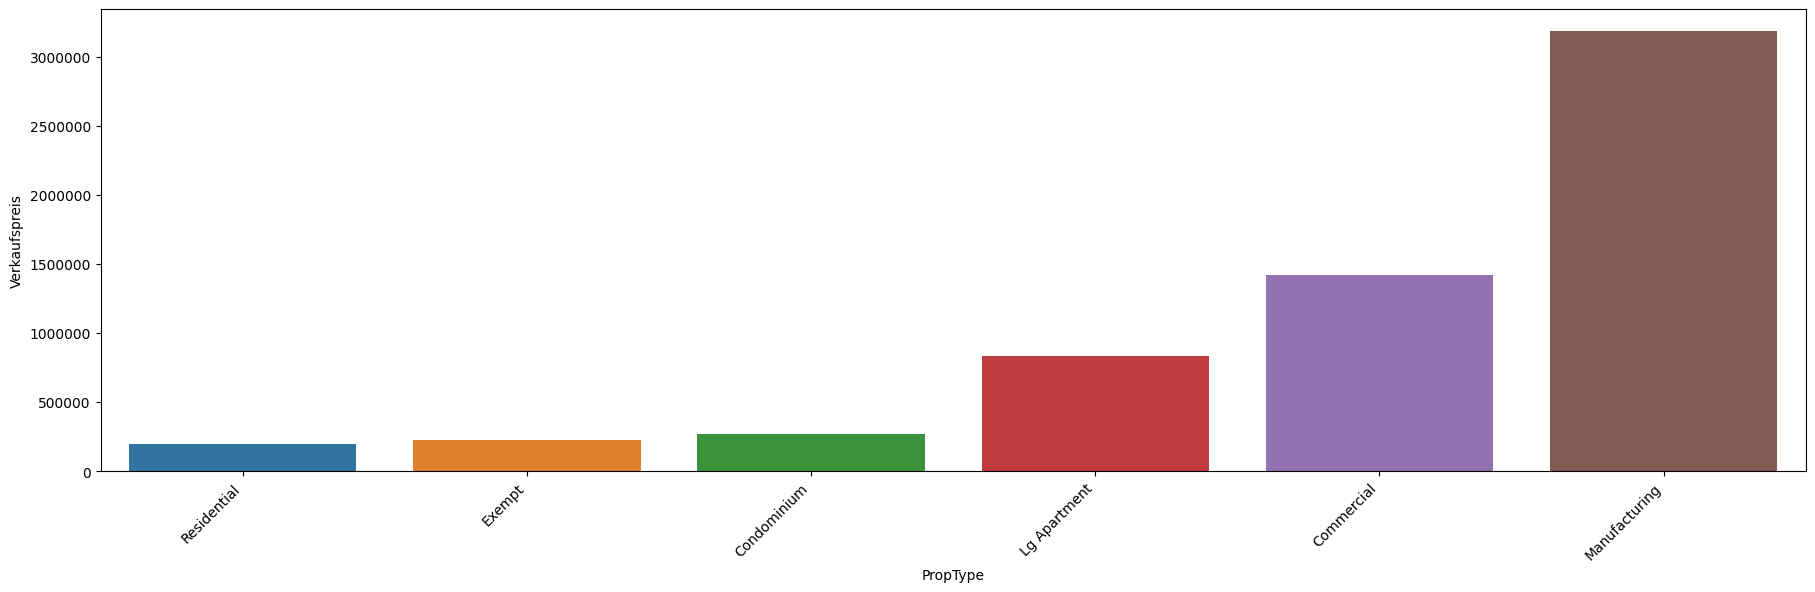

In [505]:
price_by_proptype = df.groupby('PropType')['Sale_price'].mean().reset_index()
price_by_proptype = price_by_proptype.sort_values(by='Sale_price')

plt.figure(figsize=(22, 6))
sns.barplot(price_by_proptype, x='PropType', y='Sale_price')
plt.xlabel('PropType')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45, ha="right")
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Stories

In [506]:
df['Stories'].value_counts()

Stories
1.0     3955
2.0     2008
1.5     1015
3.0       52
2.5       40
0.0       21
4.0        7
5.0        3
7.0        2
12.0       1
3.5        1
6.0        1
14.0       1
Name: count, dtype: int64

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


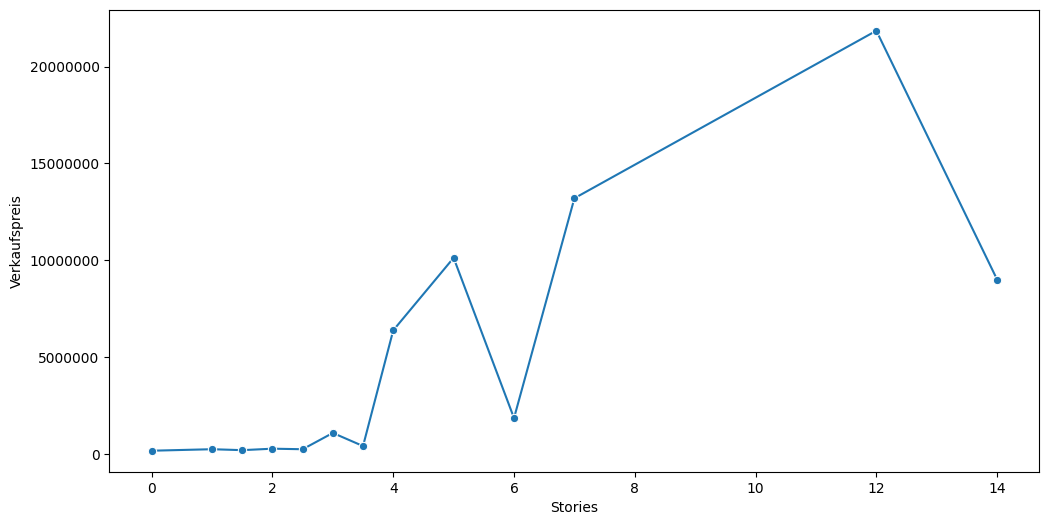

In [507]:
price_by_stories = df.groupby('Stories')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_stories, x='Stories', y='Sale_price', marker='o')
plt.xlabel('Stories')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Rooms

In [508]:
df['Rooms'].value_counts()

Rooms
5.0     1427
6.0      991
10.0     905
4.0      644
8.0      573
7.0      512
12.0     410
9.0      305
14.0     141
11.0     137
3.0      128
0.0      122
16.0      69
20.0      68
18.0      67
13.0      45
15.0      30
22.0      27
2.0       21
24.0      18
17.0       9
26.0       8
30.0       8
1.0        6
23.0       5
19.0       4
27.0       3
28.0       3
21.0       3
40.0       2
32.0       2
25.0       2
39.0       1
29.0       1
62.0       1
33.0       1
38.0       1
63.0       1
45.0       1
36.0       1
Name: count, dtype: int64

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


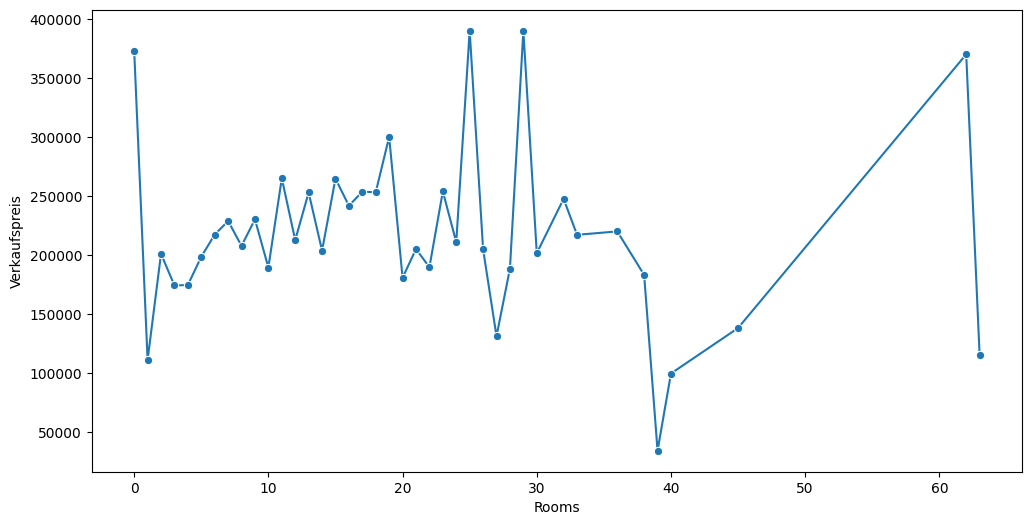

In [509]:
price_by_rooms = df.groupby('Rooms')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_rooms, x='Rooms', y='Sale_price', marker='o')
plt.xlabel('Rooms')
plt.ylabel('Verkaufspreis')
plt.show()

### Feature - Units

In [510]:
df['Units'].value_counts()

Units
1      5070
2      1564
4       166
3       135
8        40
0        29
6        28
5        25
7        16
12        8
10        8
16        7
9         5
11        4
17        2
14        2
20        2
94        2
34        2
56        2
36        1
58        1
116       1
35        1
99        1
45        1
32        1
70        1
13        1
84        1
15        1
115       1
19        1
300       1
62        1
389       1
74        1
77        1
101       1
22        1
21        1
51        1
57        1
737       1
23        1
27        1
725       1
41        1
81        1
Name: count, dtype: int64

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


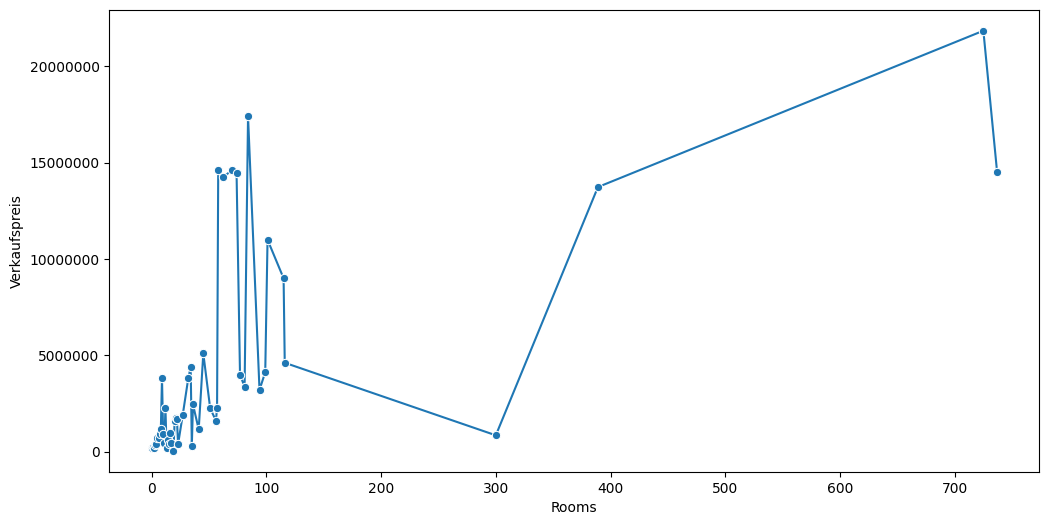

In [511]:
price_by_units = df.groupby('Units')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_units, x='Units', y='Sale_price', marker='o')
plt.xlabel('Rooms')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Bedrooms

In [512]:
df['Bdrms'].value_counts()

Bdrms
3.0     2200
4.0     1484
2.0     1037
6.0      869
5.0      371
1.0      242
8.0      215
7.0       90
10.0      53
12.0      44
9.0       38
0.0       18
11.0      10
14.0      10
13.0       7
18.0       4
15.0       4
20.0       1
25.0       1
28.0       1
29.0       1
21.0       1
32.0       1
16.0       1
Name: count, dtype: int64

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


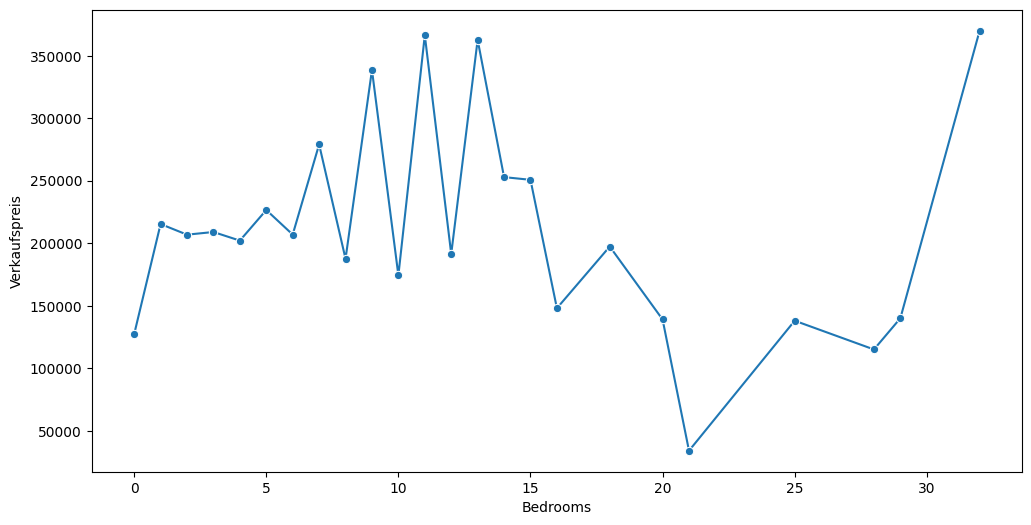

In [513]:
price_by_bedrooms = df.groupby('Bdrms')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_bedrooms, x='Bdrms', y='Sale_price', marker='o')
plt.xlabel('Bedrooms')
plt.ylabel('Verkaufspreis')
plt.show()

### Feature - FBath

In [514]:
df['Fbath'].value_counts()

Fbath
1    3409
2    2885
0     509
3     304
4      31
5       6
7       1
6       1
Name: count, dtype: int64

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


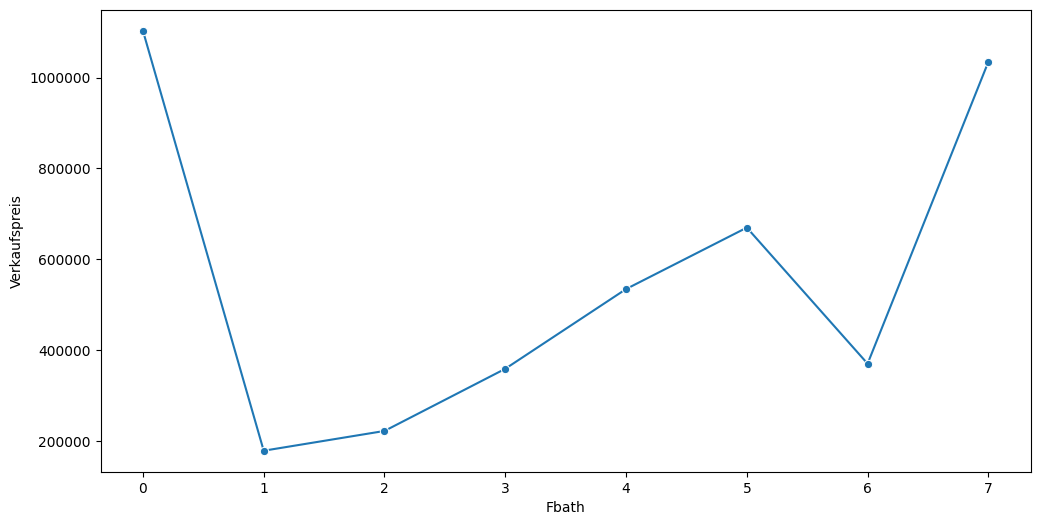

In [515]:
price_by_fbath = df.groupby('Fbath')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_fbath, x='Fbath', y='Sale_price', marker='o')
plt.xlabel('Fbath')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Hbath

In [516]:
df['Hbath'].value_counts()

Hbath
0    5183
1    1793
2     164
3       6
Name: count, dtype: int64

d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Dev\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


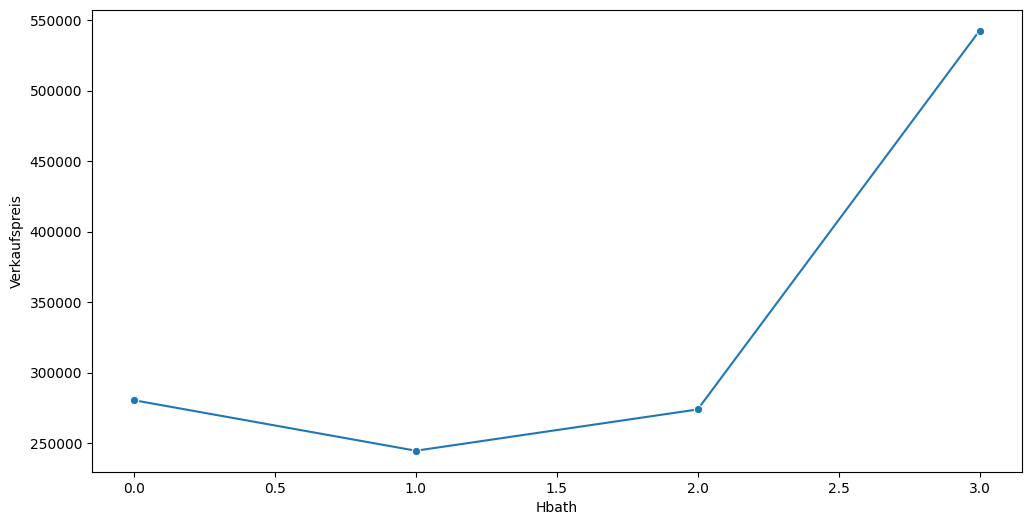

In [517]:
price_by_hbath = df.groupby('Hbath')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(price_by_hbath, x='Hbath', y='Sale_price', marker='o')
plt.xlabel('Hbath')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - FinishedSqft

In [518]:
df['FinishedSqft'].mean()

2334.262707104746

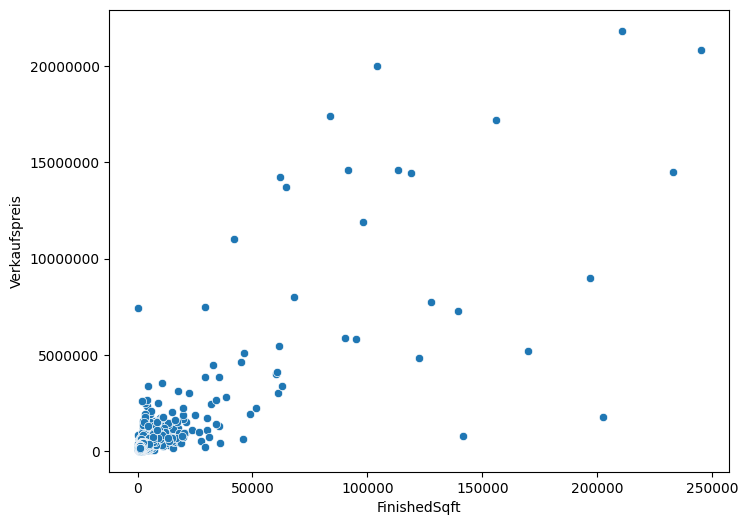

In [519]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='FinishedSqft', y='Sale_price')
plt.xlabel('FinishedSqft')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Lotsize

In [520]:
df['Lotsize'].mean()

6676.480128743353

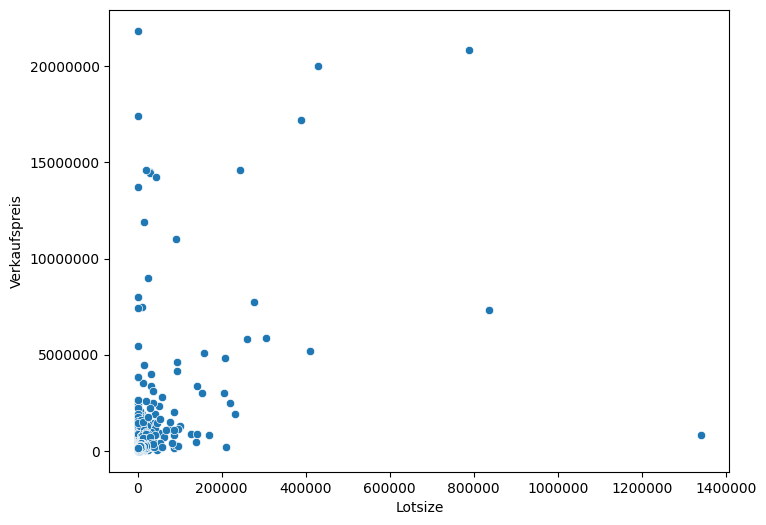

In [521]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='Lotsize', y='Sale_price')
plt.xlabel('Lotsize')
plt.ylabel('Verkaufspreis')
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.ticklabel_format(style='plain', axis='x') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - District

In [522]:
df['District'].value_counts()

District
5     778
11    612
10    586
14    562
2     531
7     530
13    524
3     513
9     488
1     468
6     366
4     322
15    297
12    296
8     273
Name: count, dtype: int64

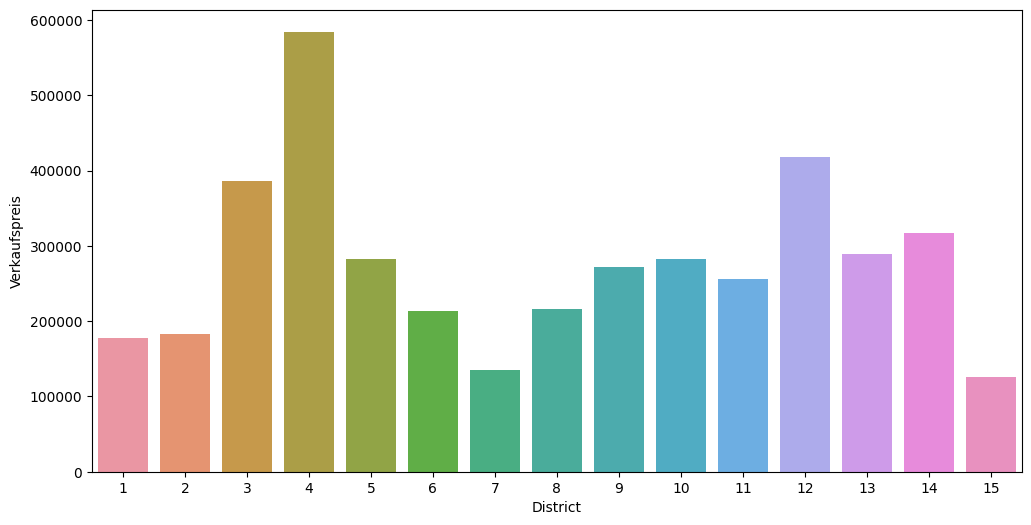

In [523]:
price_by_district = df.groupby('District')['Sale_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(price_by_district, x='District', y='Sale_price')
plt.xlabel('District')
plt.ylabel('Verkaufspreis')
plt.show()

### Feature - Style

In [524]:
df['Style'].value_counts()

Style
Ranch                        1495
Cape Cod                     1006
Duplex O/S                    552
Milwaukee Bungalow            458
Res O/S A & 1/2               439
                             ... 
Medical Clinic                  1
Custard Stand, Drive-In         1
Office Building - Class A       1
Commercial Land                 1
Neighborhood Center             1
Name: count, Length: 81, dtype: int64

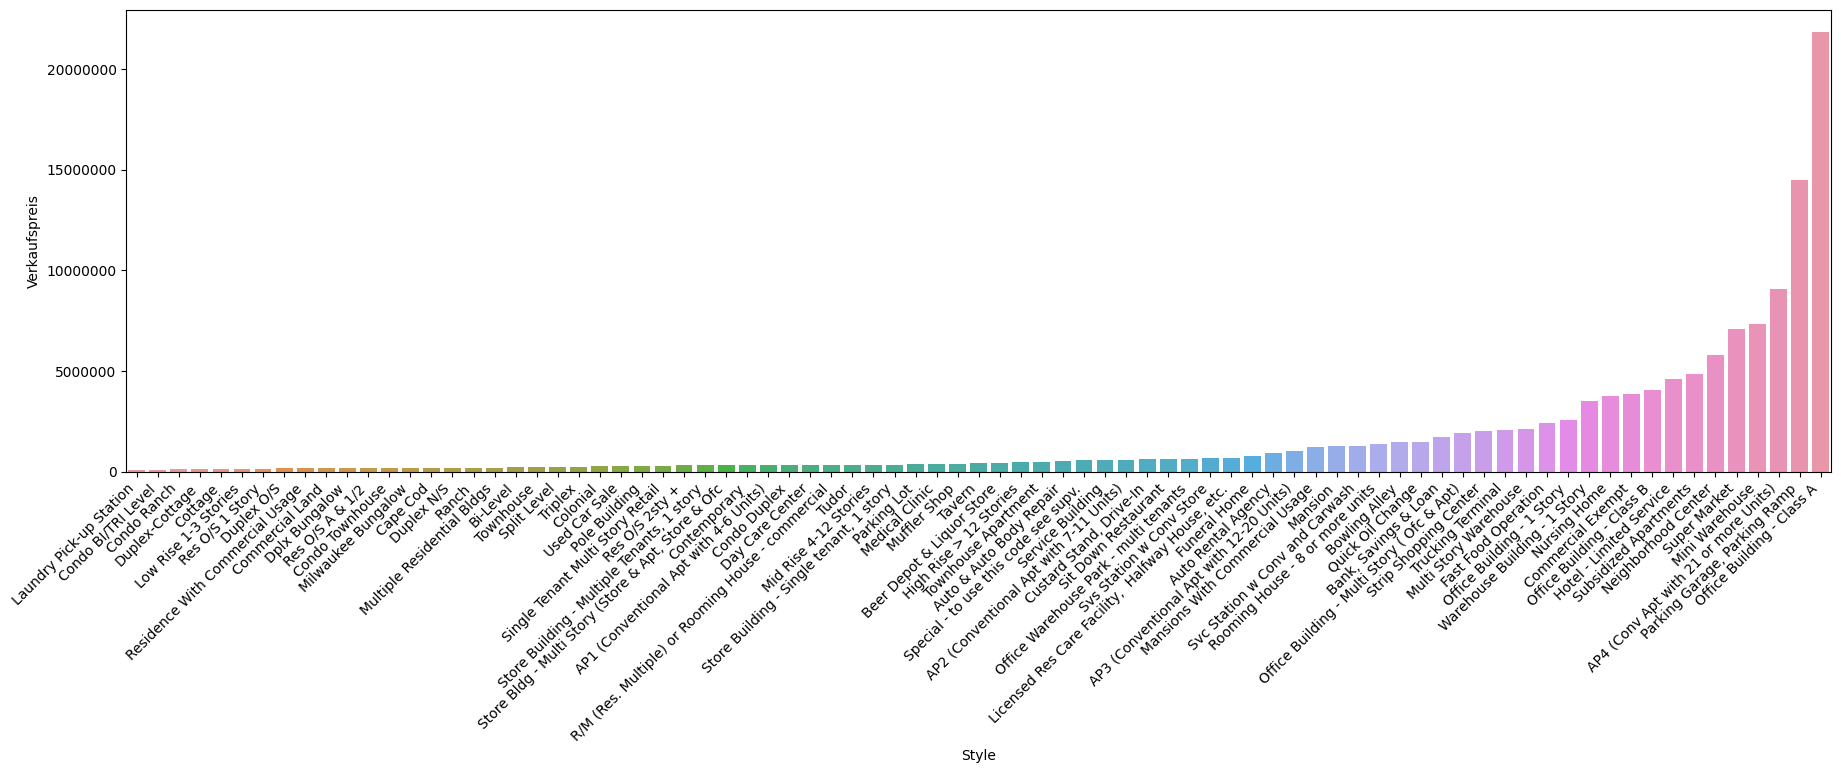

In [525]:
price_by_style = df.groupby('Style')['Sale_price'].mean().reset_index()
price_by_style = price_by_style.sort_values(by='Sale_price')

plt.figure(figsize=(22, 6))
sns.barplot(price_by_style, x='Style', y='Sale_price')
plt.xlabel('Style')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45, ha="right")
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Extwall

In [526]:
df['Extwall'].value_counts()

Extwall
Aluminum/Vinyl             3468
Brick                      1408
Wood                        331
Asphalt/Other               313
Stone                       179
Masonry/Frame               154
Stucco                       93
Concrete Block               77
Fiber Cement/Hardiplank      49
Alum/Vynyl Siding            46
Masonary Frame               27
Block                        26
Precast Masonary             14
Metal Siding                 12
Prem Wood                    11
Other                        10
Brick on Frame                1
Brick on Block                1
Name: count, dtype: int64

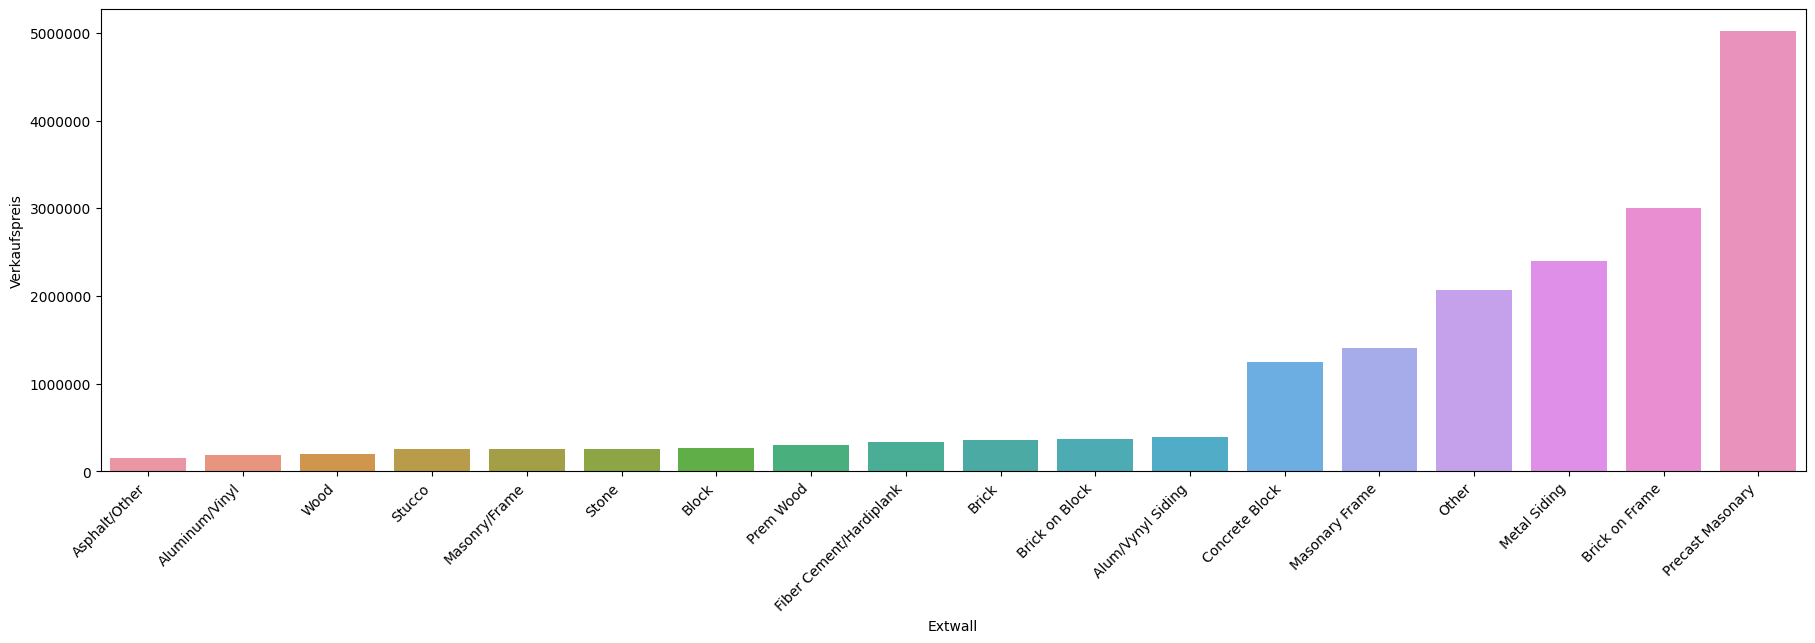

In [527]:
price_by_extwall = df.groupby('Extwall')['Sale_price'].mean().reset_index()
price_by_extwall = price_by_extwall.sort_values(by='Sale_price')

plt.figure(figsize=(22, 6))
sns.barplot(price_by_extwall, x='Extwall', y='Sale_price')
plt.xlabel('Extwall')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45, ha="right")
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen
plt.show()

### Feature - Year_Built

In [528]:
df['Year_Built'].value_counts()

Year_Built
1955.0    249
1952.0    212
1951.0    196
1954.0    195
1953.0    193
         ... 
1843.0      1
2019.0      1
1869.0      1
2020.0      1
1993.0      1
Name: count, Length: 155, dtype: int64

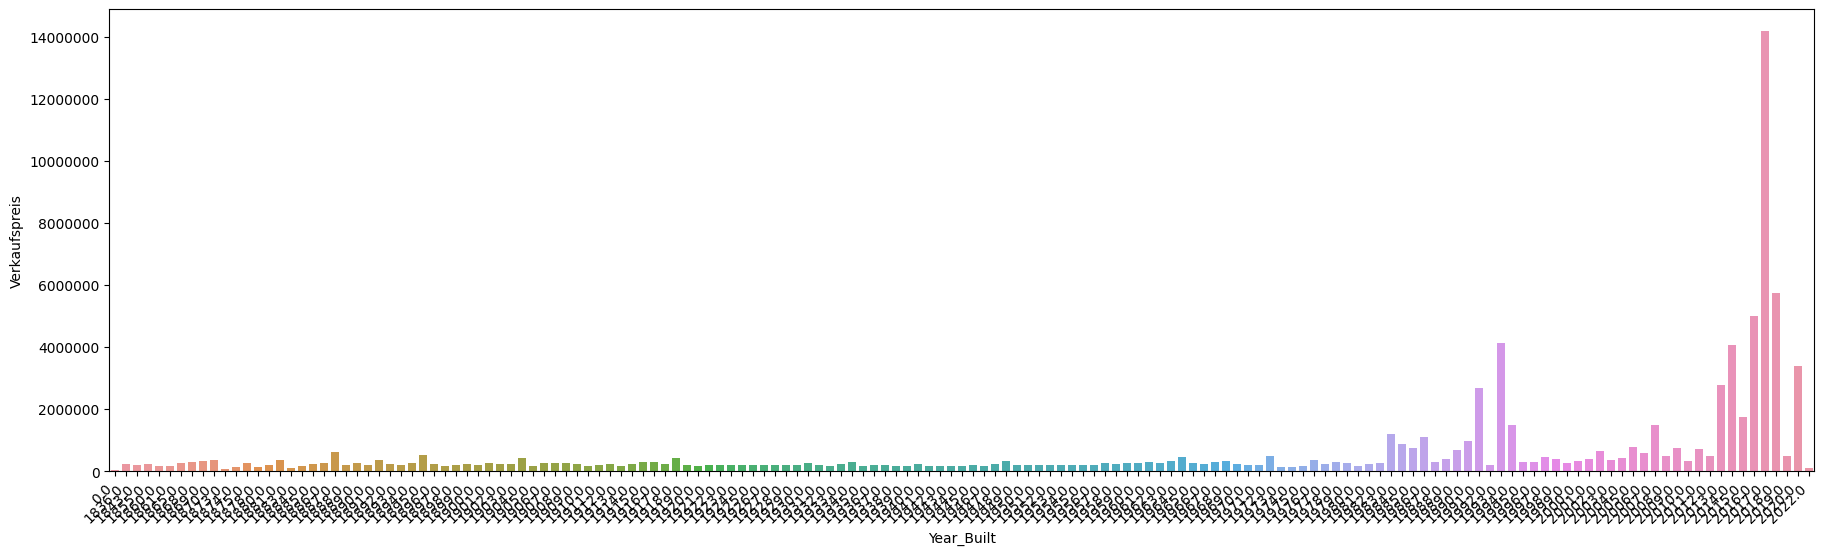

In [529]:
price_by_year_built = df.groupby('Year_Built')['Sale_price'].mean().reset_index()
price_by_year_built = price_by_year_built.sort_values(by='Sale_price')

plt.figure(figsize=(22, 6))
sns.barplot(price_by_year_built, x='Year_Built', y='Sale_price')
plt.xlabel('Year_Built')
plt.ylabel('Verkaufspreis')
plt.xticks(rotation=45, ha="right")
plt.ticklabel_format(style='plain', axis='y') # Wird benötigt, damit die Werte nicht als 0,2 x 10^X dargestellt werden sondern als Ganzzahlen

plt.show()

### Korrelation

In [530]:
corr = df.select_dtypes(exclude=["object"]).corr().round(2)
corr

,District,nbhd,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
District,1.00,0.35,0.04,-0.06,0.07,0.00,-0.01,0.06,-0.00,0.01,0.01,0.00
nbhd,0.35,1.00,0.15,0.00,-0.16,0.17,0.09,-0.19,-0.25,-0.11,0.01,0.19
Stories,0.04,0.15,1.00,0.09,0.34,0.34,0.32,0.30,0.17,0.08,0.00,0.28
Year_Built,-0.06,0.00,0.09,1.00,-0.27,0.03,0.01,-0.20,0.07,0.09,0.01,0.04
Rooms,0.07,-0.16,0.34,-0.27,1.00,0.32,0.23,0.88,0.46,0.00,0.06,0.00
FinishedSqft,0.00,0.17,0.34,0.03,0.32,1.00,0.54,0.39,-0.15,-0.05,0.62,0.81
Units,-0.01,0.09,0.32,0.01,0.23,0.54,1.00,0.27,-0.09,-0.04,0.06,0.55
Bdrms,0.06,-0.19,0.30,-0.20,0.88,0.39,0.27,1.00,0.36,0.04,0.11,0.02
Fbath,-0.00,-0.25,0.17,0.07,0.46,-0.15,-0.09,0.36,1.00,-0.03,-0.11,-0.12
Hbath,0.01,-0.11,0.08,0.09,0.00,-0.05,-0.04,0.04,-0.03,1.00,-0.01,-0.02


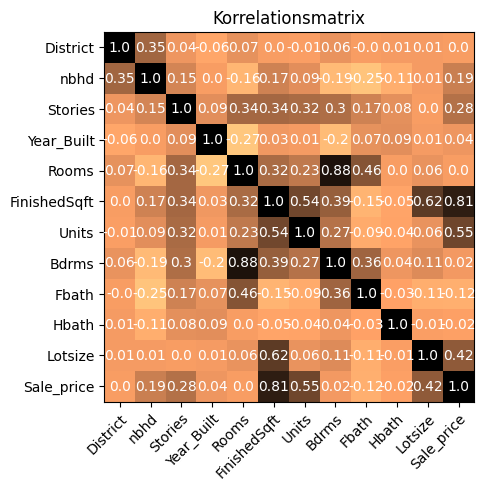

In [531]:
fig, ax = plt.subplots()
ax.imshow(corr, cmap=plt.get_cmap("copper_r"))
ax.set_xticks(np.arange(len(corr)), labels=corr.columns.to_list())
ax.set_yticks(np.arange(len(corr)), labels=corr.columns.to_list())
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j, i, corr.iloc[i, j], ha="center", va="center", color="w")

ax.set_title("Korrelationsmatrix")
plt.show()

### Analyse Ausreißer

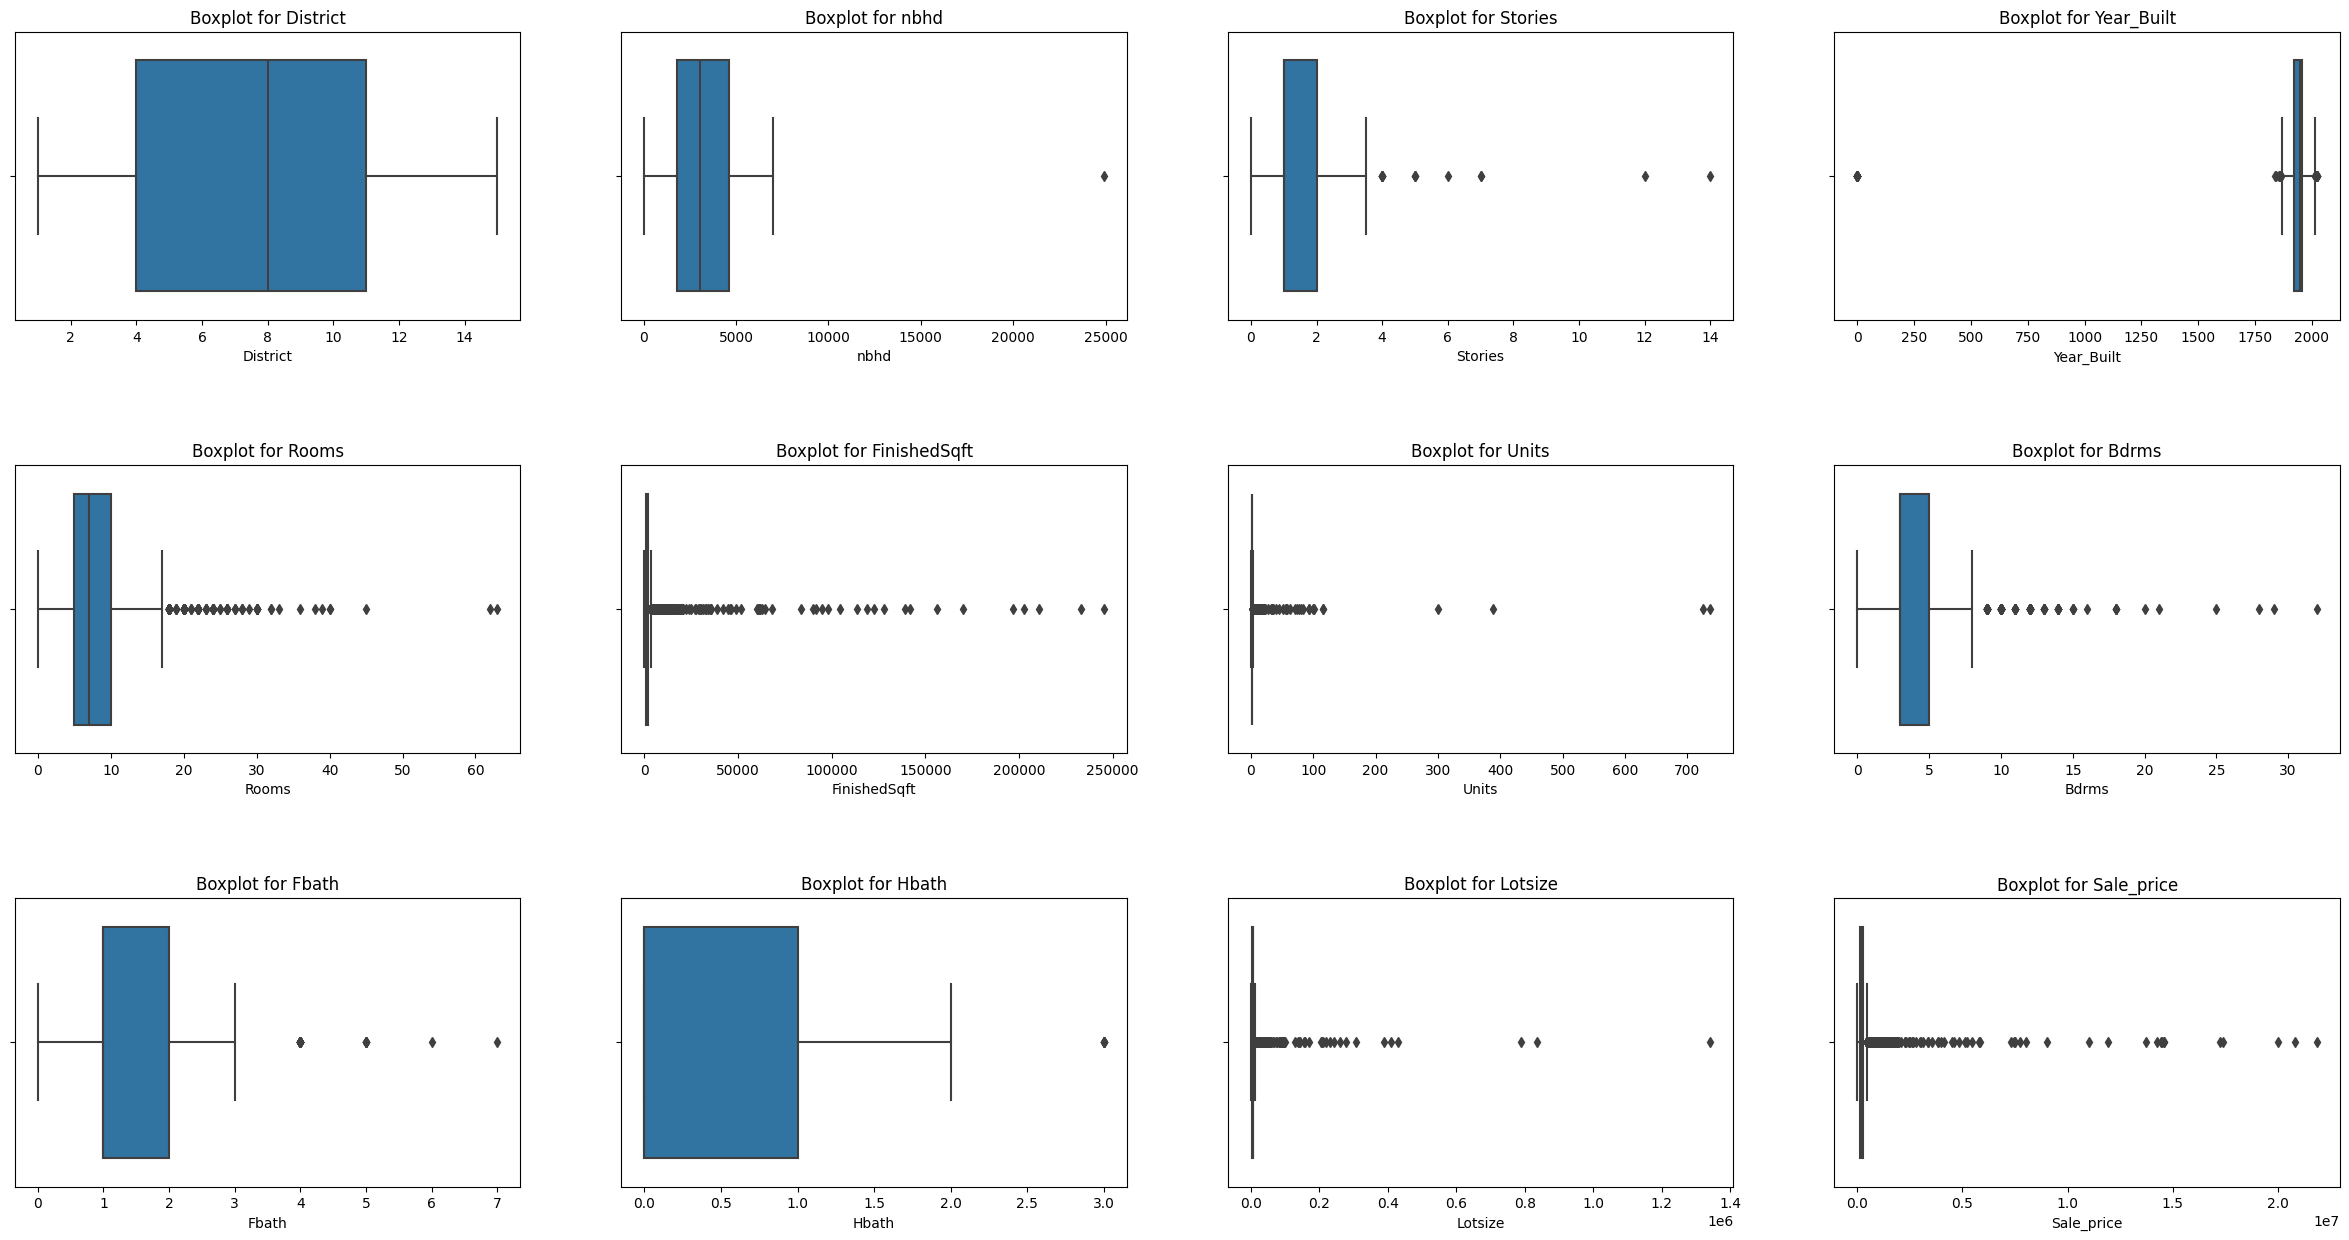

In [532]:
num_cols = df.select_dtypes(exclude=["object"]).columns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Boxplot for {col}')

plt.show()

In [533]:
df = df[df['Stories'] < 10]
df = df[df['Year_Built'] > 1800]
df = df[df['Rooms'] < 15]
df = df[df['FinishedSqft'] < 10000]
df = df[df['Bdrms'] < 8]
df = df[df['Lotsize'] < 100000]
df = df[df['Units'] < 15]

In [535]:
len(df)

6218

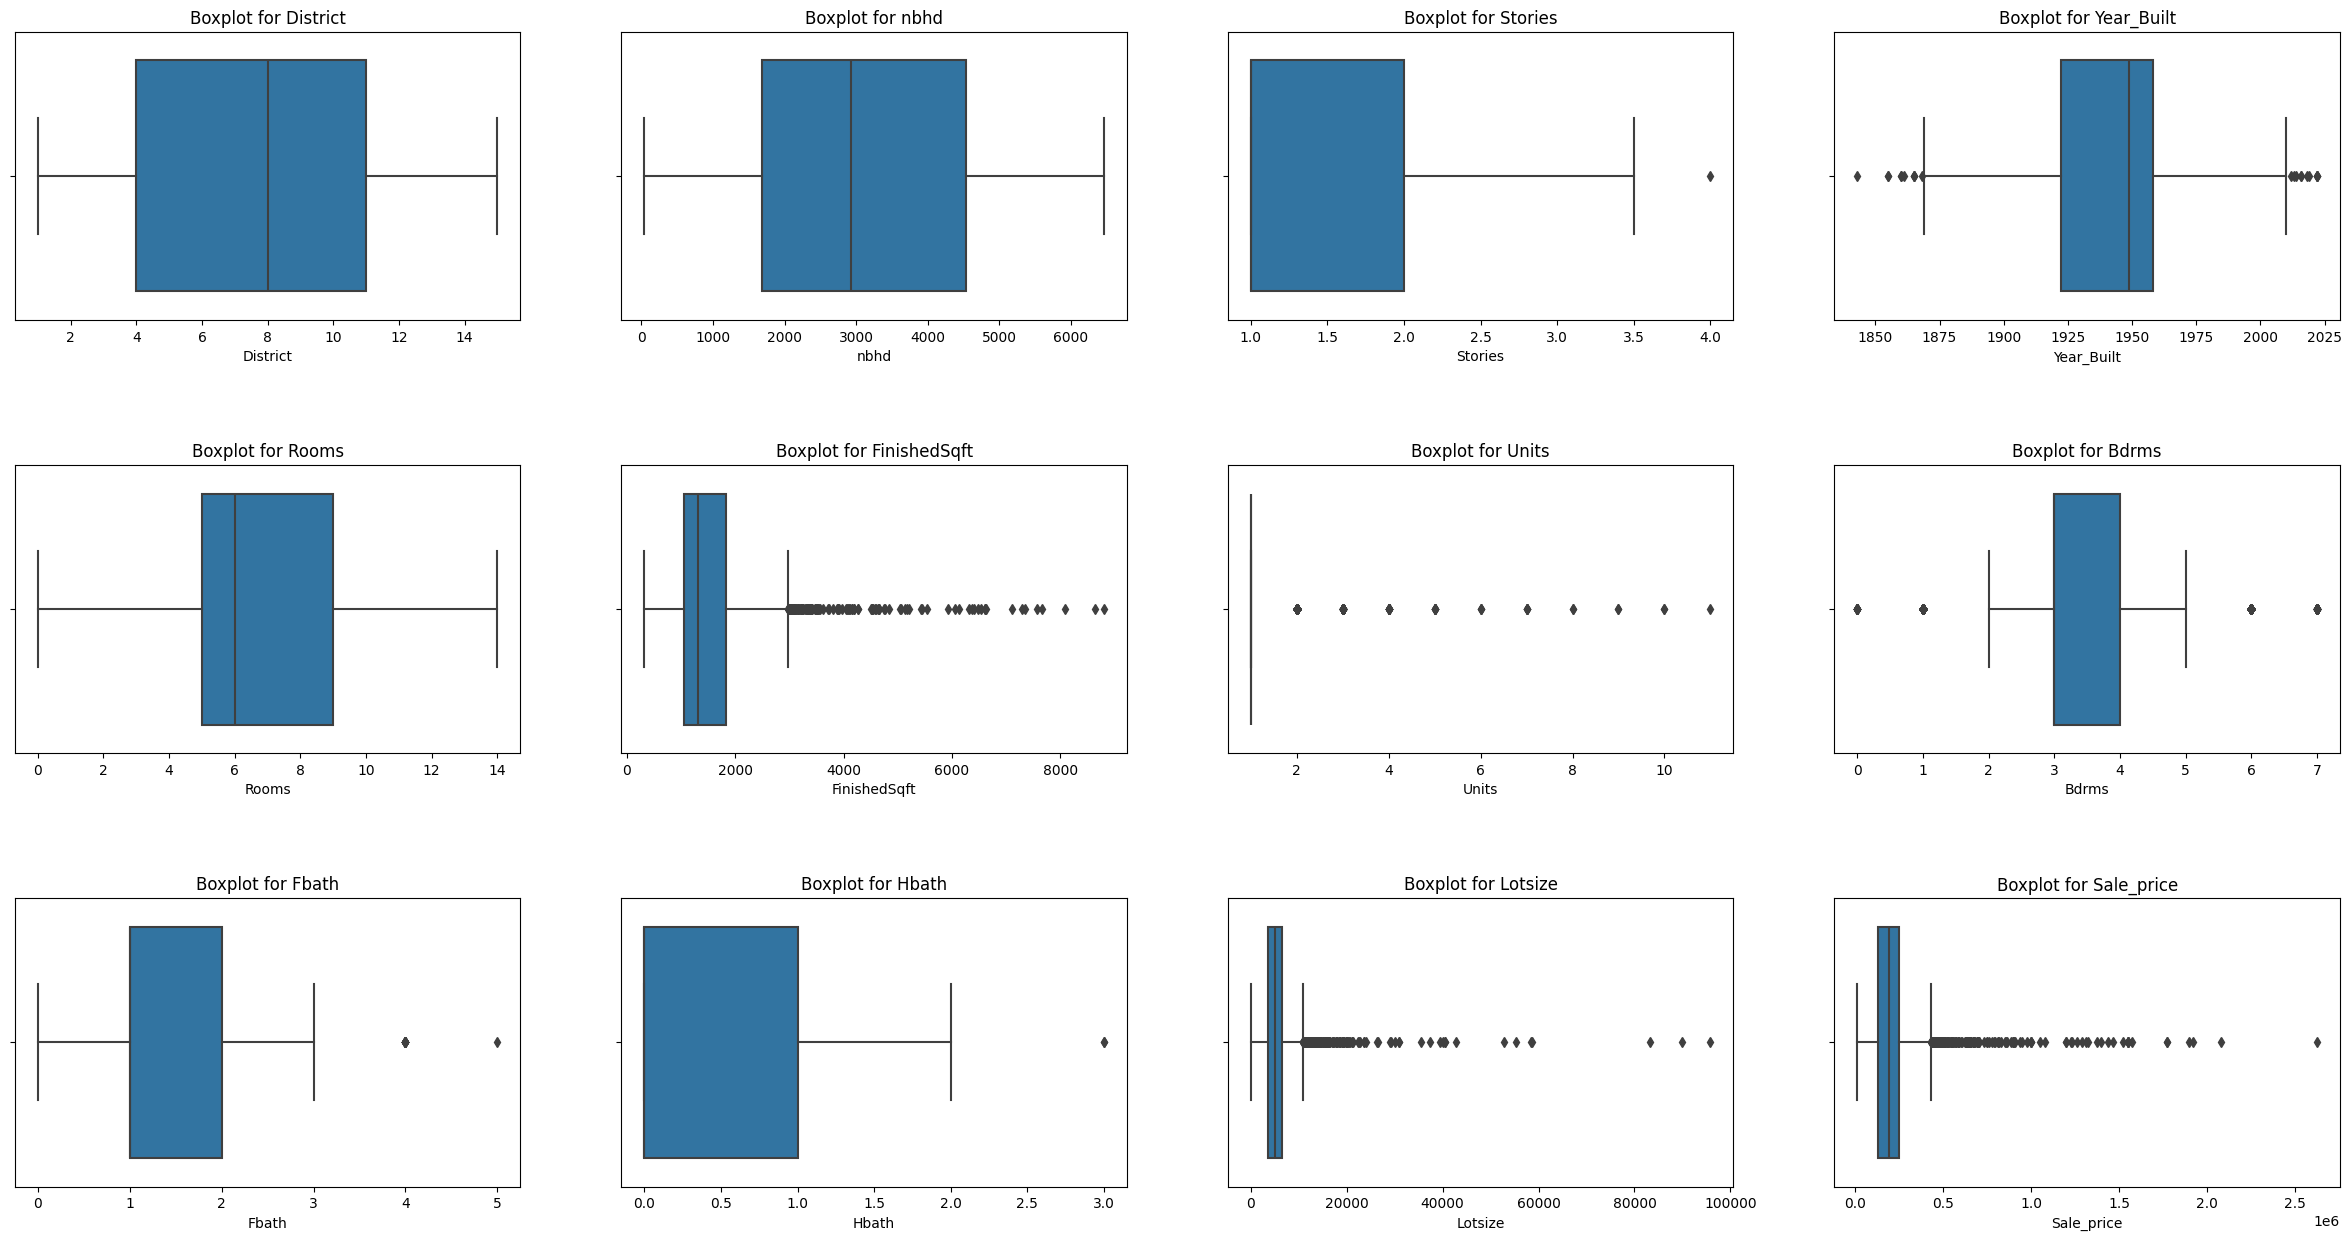

In [534]:
num_cols = df.select_dtypes(exclude=["object"]).columns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f'Boxplot for {col}')

plt.show()